In [372]:
from math import pi, cos, sin
from scipy.integrate import quad

from matplotlib import pyplot as plt


def w(frequency):
    return 2 * pi * frequency

class Fourier:
    def __init__(self, period, iterations, fn):
        self.iterations = iterations
        self.period = period
        self.frequency = 1 / self.period
        self.fn = fn
        self.a0 = 2 / self.period * quad(self.fn, 0, self.period)[0]
        
    def approx(self, t):
        sum_of_fns = 0
        for n in range(1, self.iterations + 1):
            an = 2 / self.period * quad(lambda t: self.fn(t) * cos(n * w(self.frequency) * t), 0, self.period)[0]
            bn = 2 / self.period * quad(lambda t: self.fn(t) * sin(n * w(self.frequency) * t), 0, self.period)[0]
            sum_of_fns += an * cos(n * w(self.frequency) * t) + bn * sin(n * w(self.frequency) * t)
        return self.a0 / 2 + sum_of_fns

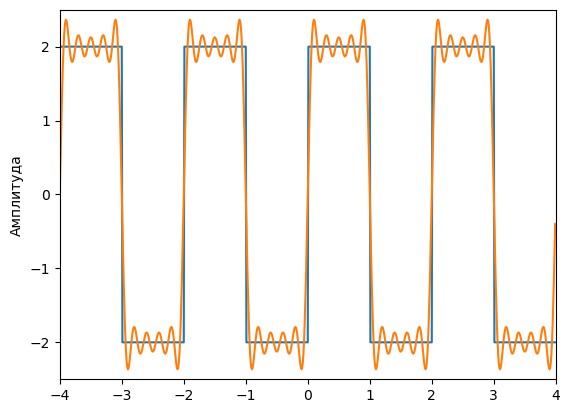

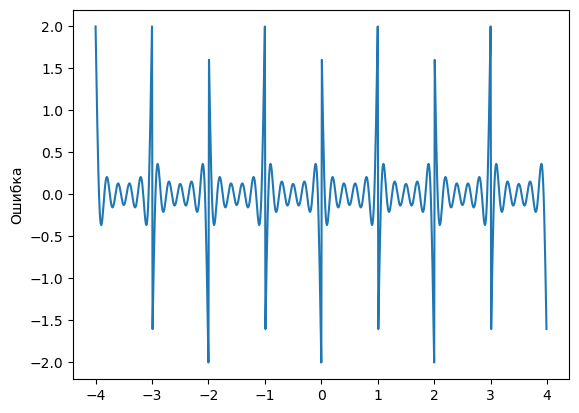

In [373]:
from math import floor


def x(t):
    return 2 if floor(t) % 2 == 0 else -2

period = 2
iterations = 10

x_fourier = Fourier(period, iterations, x)

x_values = []
y_values = []
y_fourier_values = []
error_values = []

x_val = -4
for i in range(0, 800):
    x_values.append(x_val)
    y_values.append(x(x_val))
    y_fourier_values.append(x_fourier.approx(x_val))
    error = y_values[i] - y_fourier_values[i]
    error_values.append(error)
    x_val += 0.01

plt.plot(x_values, y_values)
plt.plot(x_values, y_fourier_values)
plt.axis((-4, 4, -2.5, 2.5))
plt.ylabel("Амплитуда")
plt.show()

plt.plot(x_values, error_values)
plt.ylabel("Ошибка")
plt.show()

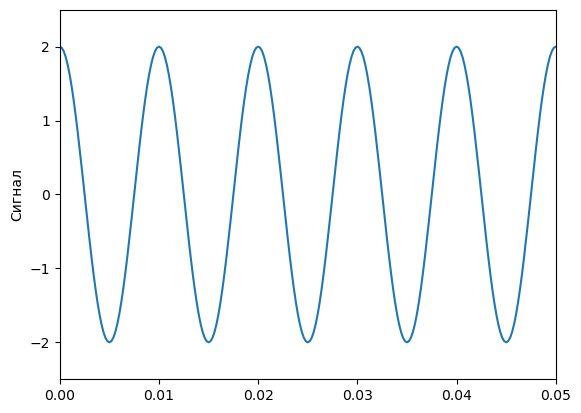

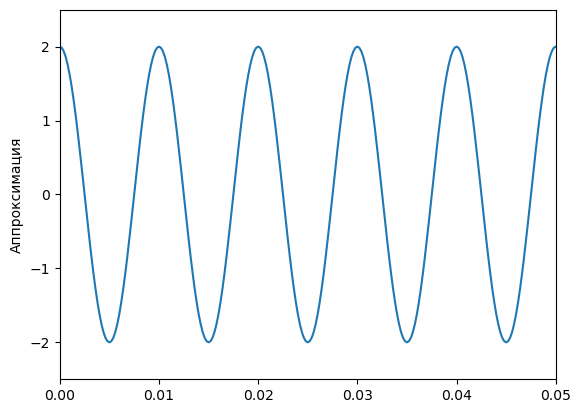

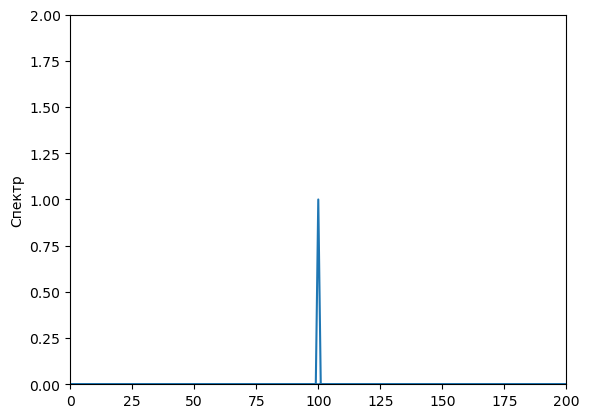

In [374]:
import numpy as np

A = 2
freq = 100
period = 1 / freq
def x(t):
    return A * cos(w(freq) * t)

x_fourier = Fourier(period, iterations, x)

x_val = 0
x_values = []
y_values = []
y_fourier_values = []
density_values = []
steps = 50 * freq

for i in range(steps):
    x_values.append(x_val)
    y_values.append(x(x_val))
    y_fourier_values.append(x_fourier.approx(x_val))
    x_val += 1 / steps
density_values = np.fft.fft(y_values) / steps

freq_values = np.fft.fftfreq(steps, 1 / steps)

plt.plot(x_values, y_values)
plt.axis((0, 0.05, -2.5, 2.5))
plt.ylabel("Сигнал")
plt.show()

plt.plot(x_values, y_fourier_values)
plt.axis((0, 0.05, -2.5, 2.5))
plt.ylabel("Аппроксимация")
plt.show()

plt.plot(freq_values, density_values)
plt.axis((0, 200, 0, 2))
plt.ylabel("Спектр")
plt.show()

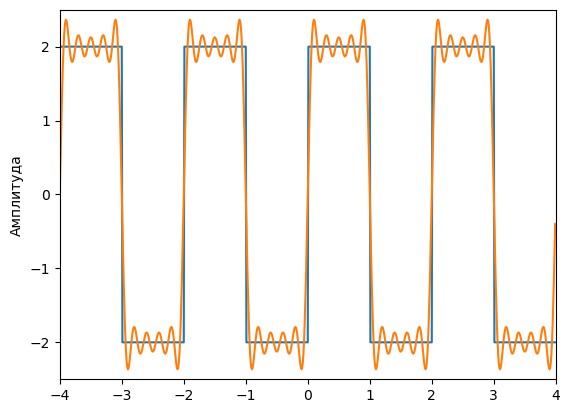

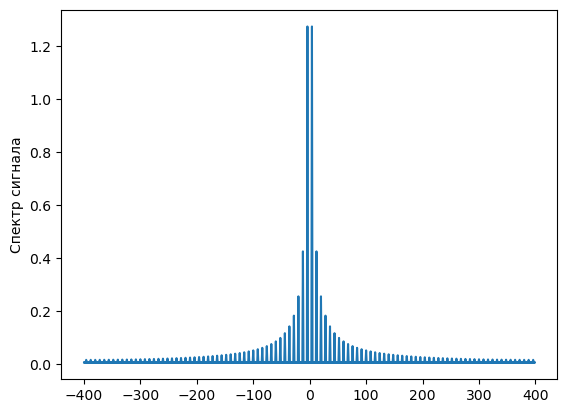

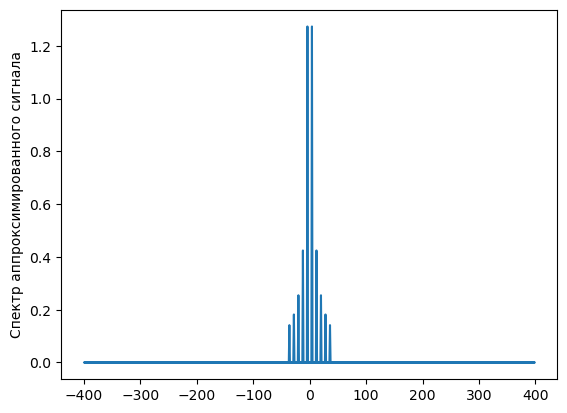

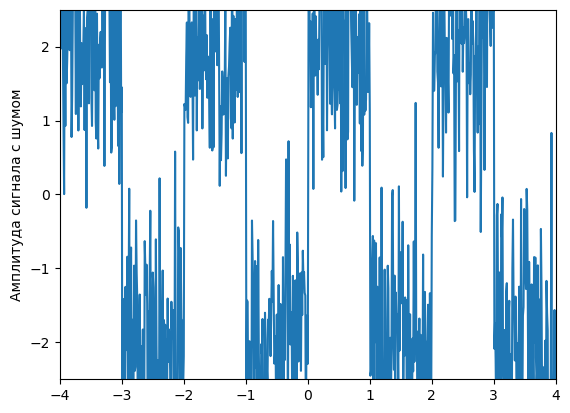

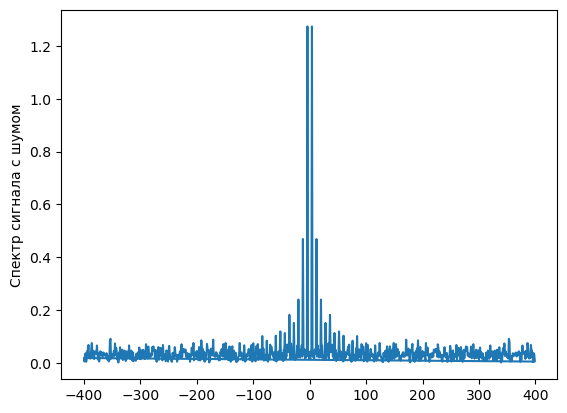

In [375]:
import numpy as np

def x(t):
    return 2 if floor(t) % 2 == 0 else -2

period = 2
iterations = 10

x_fourier = Fourier(period, iterations, x)

x_values = []
y_values = []
y_fourier_values = []
y_noisy_values = []

x_val = -4
steps = 800
for i in range(steps):
    x_values.append(x_val)
    y_values.append(x(x_val))
    y_fourier_values.append(x_fourier.approx(x_val))
    # y_noisy_values.append(x(x_val) + np.random.normal(0, 0.01, steps))
    y_noisy_values.append(x(x_val) + np.random.normal(0, 1))
    x_val += 0.01
    
density_values = abs(np.fft.fft(y_values)) / steps
approx_density_values = abs(np.fft.fft(y_fourier_values)) / steps
noisy_density_values = abs(np.fft.fft(y_noisy_values)) / steps
freq_values = np.fft.fftfreq(steps, 1 / steps)



plt.plot(x_values, y_values)
plt.plot(x_values, y_fourier_values)
plt.axis((-4, 4, -2.5, 2.5))
plt.ylabel("Амплитуда")
plt.show()

plt.plot(freq_values, density_values)
plt.ylabel("Спектр сигнала")
plt.show()


plt.plot(freq_values, approx_density_values)
plt.ylabel("Спектр аппроксимированного сигнала")
plt.show()

plt.plot(x_values, y_noisy_values)
plt.axis((-4, 4, -2.5, 2.5))
plt.ylabel("Амплитуда сигнала с шумом")
plt.show()


plt.plot(freq_values, noisy_density_values)
plt.ylabel("Спектр сигнала с шумом")
plt.show()